# User Story 1
- User initializes several algorithm and dataset combinations
- the respective objects are created and substeps of the experiment pipeline are executed subsequently.
- Users algorithm choice is MR-Hydra, Weasel-V2 and QUANT (which are the best performing & most time efficient of their category). 
- Datasets involved are: ProximalPhalanxTW ElectricDevices and LargeKitchenApplications
- Sometimes the user is interested in visualizing the data before applying DCA. Some performance metrics are visualized

In [3]:
import os
from pathlib import Path
import warnings
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

#---- Ensure cwd = root_directory
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent)


from src.data_handlers.basic_func import dataset_provider,dataset_overview
from src.dca.apply_dca import apply_label_errors
from src.visuals.visualizations import visualize_acc_decr, visualize_trace_M
from src.utils.utilizations import setup_logger

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
logger = setup_logger("Basic_Func_Logger")
logger.info(f"Working directory set to:{os.getcwd()}")

[2025-10-28 13:31:51] INFO - Working directory set to:/Users/david/Documents/Studium D&E/Applied AI/David_MA


In [4]:
DATASET_NAME = "ProximalPhalanxTW"      #should be in DS_list
CLASSIFIER_NAME = "Quant"               #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                            #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1", "random_seed":0,"start":0,"stop":50,"step":2,"p_vec":None}    #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"        #respect folder structure
SAVE_FILES = True 
DATA_VIS  = False


[2025-10-28 13:32:09] INFO - X_train             : (400, 1, 80)
[2025-10-28 13:32:09] INFO - y_train             : (400,)
[2025-10-28 13:32:09] INFO - X_test              : (205, 1, 80)
[2025-10-28 13:32:09] INFO - y_test              : (205,)
[2025-10-28 13:32:09] INFO - X_train_small       : (400, 1, 80)
[2025-10-28 13:32:09] INFO - y_train_small       : (400,)
[2025-10-28 13:32:09] INFO - X_test_small        : (205, 1, 80)
[2025-10-28 13:32:09] INFO - y_test_small        : (205,)


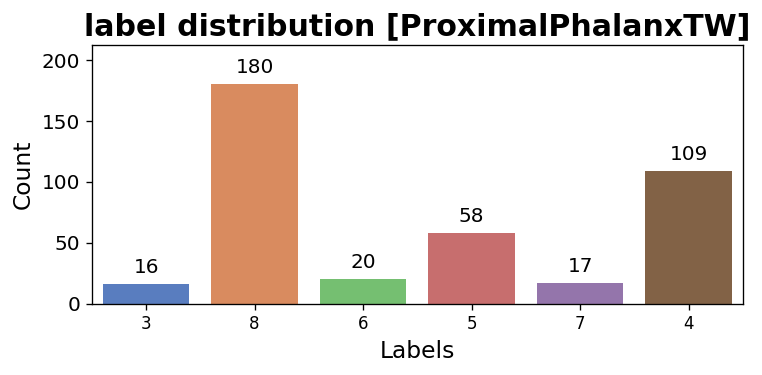

In [5]:
# Classifier MR-Hydra, Dataset Beef 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)

In [6]:
current_cl = _set_bakeoff_classifier(CLASSIFIER_NAME, random_state=0, n_jobs=1)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME,doe_param=DoE_PARAM)

[2025-10-28 13:32:20] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:32:20] INFO - requested_instance_step = 8.0 will be transformed into 8
[2025-10-28 13:32:20] INFO - requested_percentage_step = 2 % || transformed into 2.0 %
[2025-10-28 13:32:20] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-10-28 13:32:20] INFO - label_names: ['3' '4' '5' '6' '7' '8']
[2025-10-28 13:32:20] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-10-28 13:32:20] INFO - The p_vector for the current_experiment: [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]
[2025-10-28 13:32:20] INFO - Searching inside simulation_results/Quant/ProximalPhalanxTW for results
[2025-10-28 13:32:20] INFO - Looking for files matching pattern: leV1_0_(\d+)_(\d+)_(\d+) with start=0, stop=200, step=8
[2025-10-28 13:32:20] INFO - 📁 Found directories: ['leV1_0_0_400_8']
[2025-10-28 13:32:20] INFO - 🟡 Partial Match found: leV1_0_0_400_8
[2025-10-28 13:32:20] IN

In [7]:
#Look at the top of the resulting DataFrame
df_.head()

,step,LE_instances,LE_relative,accuracy,train_time,eval_time,y_train_history,y_pred,y_pred_prob
0,1,0,0.00,0.795122,0.6758,0.1638,"[3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 3, 8, 8, 8, ...","[8, 8, 4, 8, 8, 8, 8, 6, 8, 5, 8, 8, 4, 5, 4, ...","[[0.0, 0.0, 0.0, 0.0, 0.01, 0.99], [0.0, 0.0, ..."
1,2,8,0.02,0.795122,0.6676,0.1639,"[3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 3, 8, 8, 8, ...","[8, 8, 4, 8, 8, 8, 8, 6, 8, 5, 8, 8, 4, 5, 4, ...","[[0.025, 0.005, 0.0, 0.0, 0.01, 0.96], [0.02, ..."
2,3,16,0.04,0.795122,0.6888,0.1639,"[3, 3, 3, 3, 4, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, ...","[8, 8, 4, 8, 8, 8, 8, 6, 8, 5, 8, 8, 4, 5, 4, ...","[[0.03, 0.005, 0.0, 0.0, 0.015, 0.95], [0.01, ..."
3,4,24,0.06,0.800000,0.7170,0.1642,"[3, 3, 3, 3, 4, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, ...","[8, 8, 4, 8, 8, 8, 8, 6, 8, 5, 8, 8, 4, 5, 4, ...","[[0.015, 0.005, 0.0, 0.0, 0.01, 0.97], [0.025,..."
4,5,32,0.08,0.814634,0.7513,0.1647,"[3, 3, 3, 3, 4, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, ...","[8, 8, 4, 8, 8, 8, 8, 6, 8, 5, 8, 8, 4, 5, 4, ...","[[0.0, 0.005, 0.005, 0.0, 0.01, 0.98], [0.01, ..."


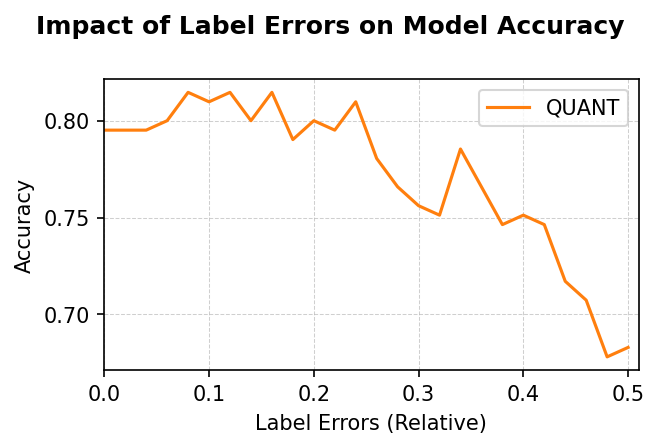

In [8]:
#Observe the accuracy decrease when Label Errors get intruded
visualize_acc_decr(df_acc_inst_rel=df_, dpi_=150, first="relative", second=None, w_=4.5, h_=3,
                   cl_="QUANT", ds_="ProxiPhTW", save_fig=False)

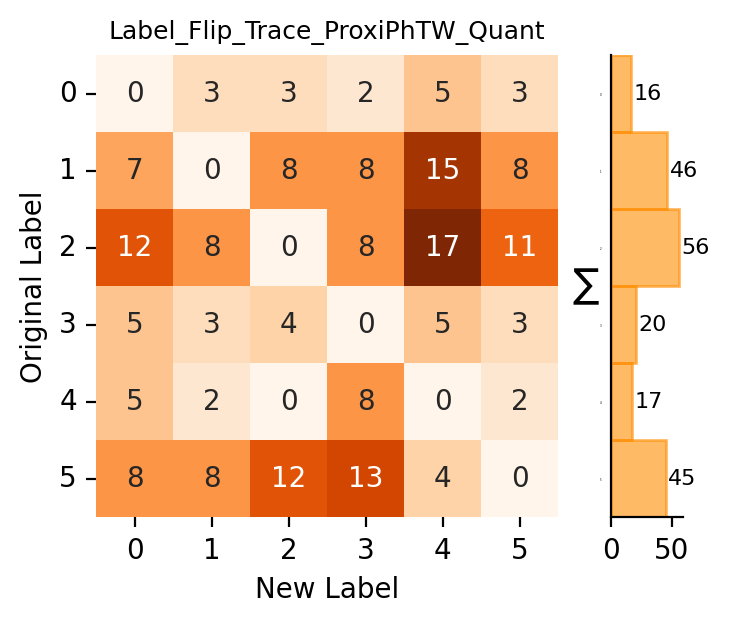

In [9]:
visualize_trace_M(trace_M=trace_M_, cl_="Quant", ds_="ProxiPhTW",dpi=200, filename_="trace_M", save_fig=False, exp_folder=None)

In [10]:
DATASET_NAME = "ElectricDevices"        #should be in DS_list
CLASSIFIER_NAME = "Quant"               #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                            #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1", "random_seed":0,"start":0,"stop":20,"step":2,"p_vec":None}    #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True 
DATA_VIS  = False

In [11]:
# Classifier Quant, Dataset ED 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
#x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = _set_bakeoff_classifier(CLASSIFIER_NAME, random_state=0, n_jobs=1)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)


[2025-10-28 13:33:37] INFO - X_train             : (8926, 1, 96)
[2025-10-28 13:33:37] INFO - y_train             : (8926,)
[2025-10-28 13:33:37] INFO - X_test              : (7711, 1, 96)
[2025-10-28 13:33:37] INFO - y_test              : (7711,)
[2025-10-28 13:33:37] INFO - X_train_small       : (8926, 1, 96)
[2025-10-28 13:33:37] INFO - y_train_small       : (8926,)
[2025-10-28 13:33:37] INFO - X_test_small        : (7711, 1, 96)
[2025-10-28 13:33:37] INFO - y_test_small        : (7711,)
[2025-10-28 13:33:37] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:33:37] INFO - requested_instance_step = 178.52 will be transformed into 179
[2025-10-28 13:33:37] INFO - requested_percentage_step = 2 % || transformed into 2.0054 %
[2025-10-28 13:33:37] INFO - requested_number_of_percentage_steps = 9 was increased by one
[2025-10-28 13:33:37] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-10-28 13:33:37] INFO - label_names: ['1' 

[2025-10-28 13:33:43] INFO - X_train             : (8926, 1, 96)
[2025-10-28 13:33:43] INFO - y_train             : (8926,)
[2025-10-28 13:33:43] INFO - X_test              : (7711, 1, 96)
[2025-10-28 13:33:43] INFO - y_test              : (7711,)
[2025-10-28 13:33:43] INFO - X_train_small       : (8926, 1, 96)
[2025-10-28 13:33:43] INFO - y_train_small       : (8926,)
[2025-10-28 13:33:43] INFO - X_test_small        : (7711, 1, 96)
[2025-10-28 13:33:43] INFO - y_test_small        : (7711,)
[2025-10-28 13:33:43] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:33:43] INFO - requested_instance_step = 178.52 will be transformed into 179
[2025-10-28 13:33:43] INFO - requested_percentage_step = 2 % || transformed into 2.0054 %
[2025-10-28 13:33:43] INFO - requested_number_of_percentage_steps = 9 was increased by one
[2025-10-28 13:33:43] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-10-28 13:33:43] INFO - label_names: ['1' 

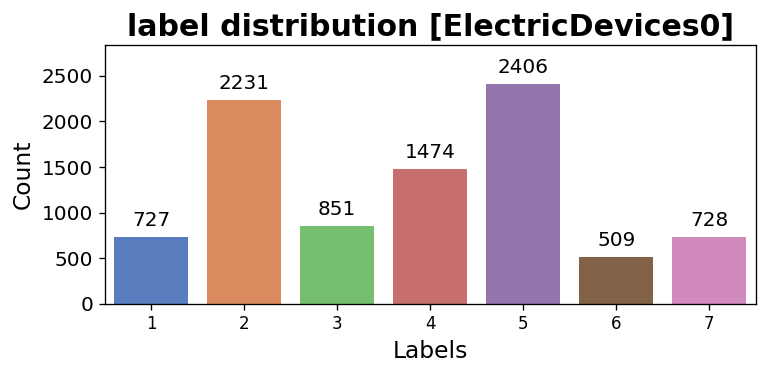

In [12]:
#Classifier Weasel-D, Dataset ED
ds_ED, meta_ED = dataset_provider(name="ElectricDevices", reduction_factor=1, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=ds_ED["y_train_small"] , dataset_name="ElectricDevices0")
Weasel_D= _set_bakeoff_classifier("Weasel-D", random_state=0, n_jobs=1)
cl_dict = {"Weasel-D":Weasel_D}
df_ED_W2, trace_m_ED_W2 = apply_label_errors(train_test_df=ds_ED, cl_dict=cl_dict, ds_="ElectricDevices", doe_param=DoE_PARAM)

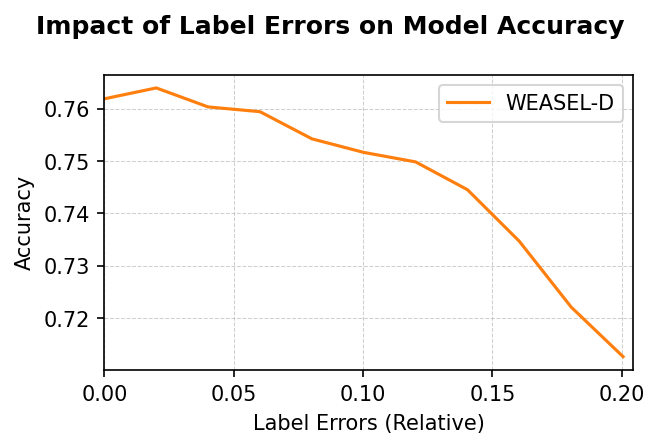

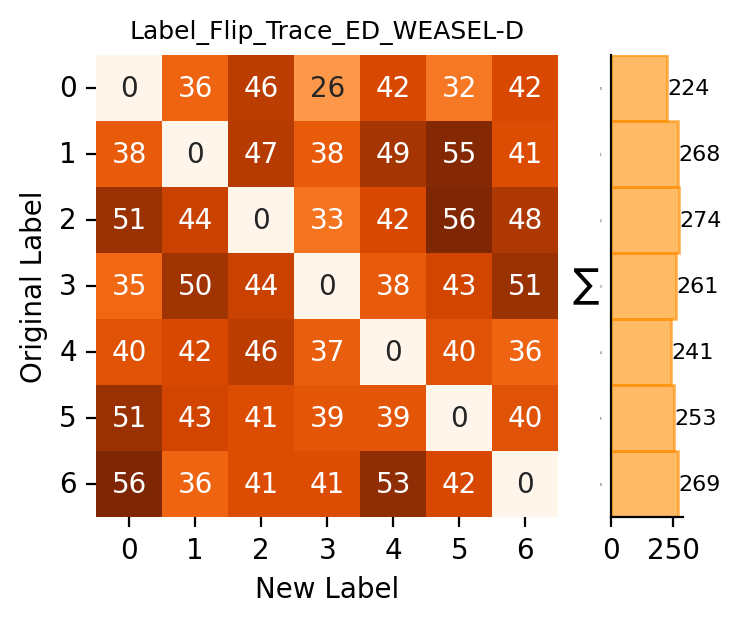

In [13]:
visualize_acc_decr(df_acc_inst_rel=df_ED_W2, dpi_=150, first="relative", second=None, w_=4.5, h_=3,
                   cl_="WEASEL-D", ds_="ElectricDevices", save_fig=False)
visualize_trace_M(trace_M=trace_M_, cl_="WEASEL-D", ds_="ED",dpi=200, filename_="trace_M", save_fig=False, exp_folder=None)

[2025-10-28 13:34:08] INFO - X_train             : (375, 1, 720)
[2025-10-28 13:34:08] INFO - y_train             : (375,)
[2025-10-28 13:34:08] INFO - X_test              : (375, 1, 720)
[2025-10-28 13:34:08] INFO - y_test              : (375,)
[2025-10-28 13:34:08] INFO - X_train_small       : (375, 1, 720)
[2025-10-28 13:34:08] INFO - y_train_small       : (375,)
[2025-10-28 13:34:08] INFO - X_test_small        : (375, 1, 720)
[2025-10-28 13:34:08] INFO - y_test_small        : (375,)
[2025-10-28 13:34:08] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-10-28 13:34:08] INFO - requested_instance_step = 7.5 will be transformed into 8
[2025-10-28 13:34:08] INFO - requested_percentage_step = 2 % || transformed into 2.1333 %
[2025-10-28 13:34:08] INFO - requested_number_of_percentage_steps = 9 was increased by one
[2025-10-28 13:34:08] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-10-28 13:34:08] INFO - label_names: ['1' '2' '3']


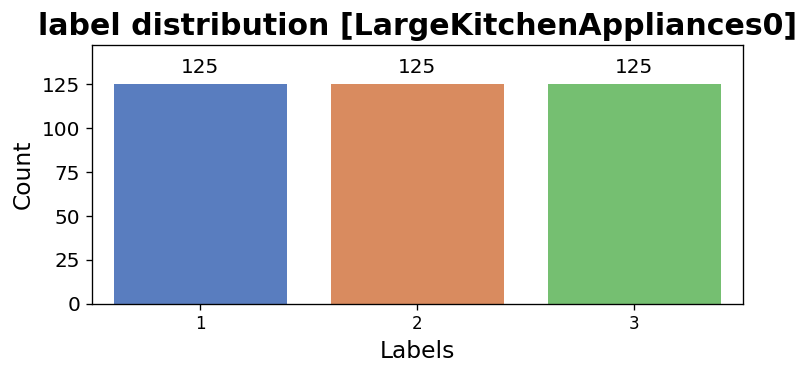

In [14]:
# Classifier Weasel-D, Dataset LKA
ds_LKA, meta_LKA = dataset_provider(name="LargeKitchenAppliances", reduction_factor=1, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=ds_LKA["y_train_small"] , dataset_name="LargeKitchenAppliances0")
Weasel_D = _set_bakeoff_classifier("Weasel-D", random_state=0, n_jobs=1)
cl_dict2 = {"Weasel-D": Weasel_D}
df_LKA_W2, trace_m_LKA_W2 = apply_label_errors(train_test_df=ds_LKA, cl_dict=cl_dict2, ds_="LKA", doe_param=DoE_PARAM)

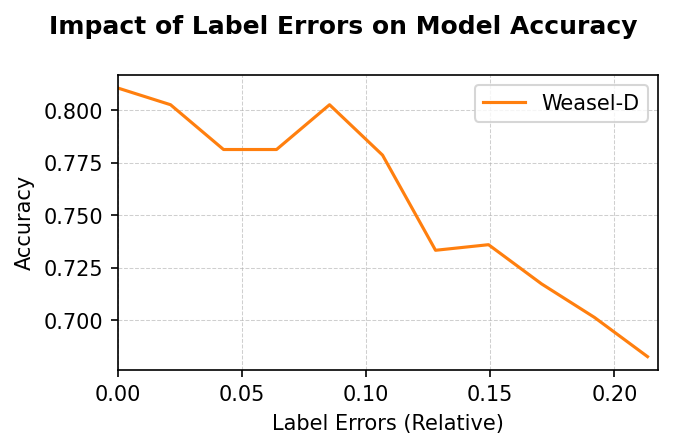

In [15]:
visualize_acc_decr(df_acc_inst_rel=df_LKA_W2, dpi_=150, first="relative", second=None, w_=4.5, h_=3,
                   cl_="Weasel-D", ds_="LargeKitchenApplications", save_fig=True)

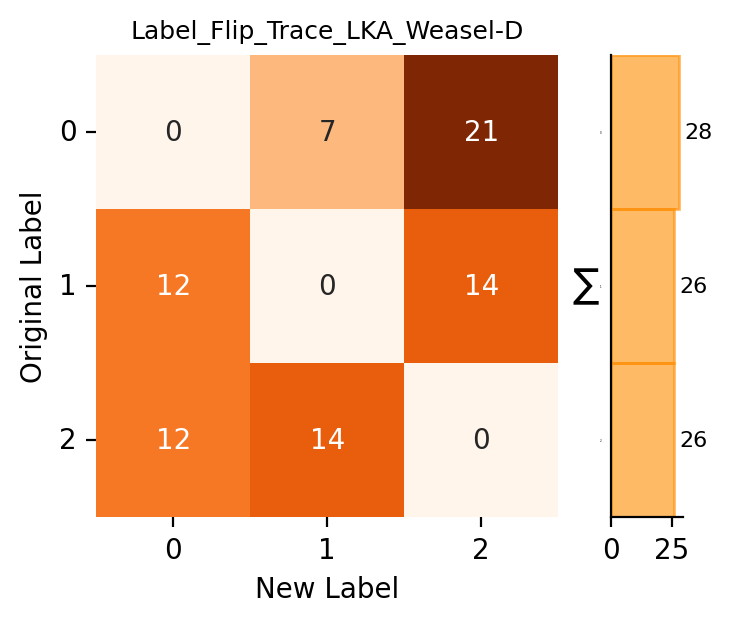

In [17]:
visualize_trace_M(trace_M=trace_m_LKA_W2, cl_="Weasel-D", ds_="LKA",dpi=150, filename_="trace_M", save_fig=False, exp_folder=None)